**Objective:** The objective of this analysis is to identify and quantify the key factors influencing the first-day viewership of content on ShowTime, an OTT service provider. By constructing a linear regression model, this report aims to analyze the impact of variables such as user platform engagement, marketing efforts, content scheduling, and external factors like weekends and holidays. The insights from this model will help ShowTime develop targeted strategies to enhance content visibility and overall platform engagement, ensuring improved first-day viewership.

**Data Description**
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary:**
1. visitors: Average number of visitors, in millions, to the platform in the past week
2. ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)
3. major_sports_event: Any major sports event on the day
4. genre: Genre of the content
5. dayofweek: Day of the release of the content
6. season: Season of the release of the content
7. views_trailer: Number of views, in millions, of the content trailer
8. views_content: Number of first-day views, in millions, of the content

# **Data Overview**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/ottdata.csv')

In [6]:
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [8]:
df.shape

(1000, 8)

* The dataset contains 8 columns and 1000 rows
* views_content is the target variable
* There are 5 numerical columns and 3 categorical columns. These categorical variables must be accessed and if significant, dummy variables must be created by to transform them into numerical values before passing on to the Linear Model  

In [9]:
df.describe()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,1.704290,1434.712290,0.400000,66.91559,0.473400
std,0.231973,289.534834,0.490143,35.00108,0.105914
min,1.250000,1010.870000,0.000000,30.08000,0.220000
25%,1.550000,1210.330000,0.000000,50.94750,0.400000
50%,1.700000,1383.580000,0.000000,53.96000,0.450000
75%,1.830000,1623.670000,1.000000,57.75500,0.520000
max,2.340000,2424.200000,1.000000,199.92000,0.890000


There are no missing values in the data

# **Exploratory Data Analysis and Answering Key Questions**

**Univariate Analysis**

In [10]:
# visitors

df['visitors'].describe()

,visitors
count,1000.000000
mean,1.704290
std,0.231973
min,1.250000
25%,1.550000
50%,1.700000
75%,1.830000
max,2.340000


<Axes: xlabel='visitors', ylabel='Count'>

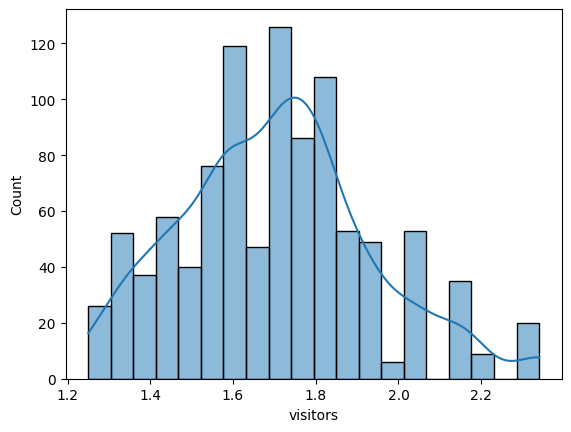

In [11]:
sns.histplot(df['visitors'], kde=True)

**Observations:**
* The histogram shows the distribution of visitors with values ranging between 1.2 to 2.2 million.
* The distribution appears to be slightly right-skewed, with a higher concentration of values around 1.5 to 1.8 million visitors.
* The majority lies between 1.6 to 1.8 million visitors, peaking around 1.7 million.
* There are fewer instances of content with either very low or very high visitor counts (i.e., below 1.3 million or above 2.0 million).

<Axes: ylabel='visitors'>

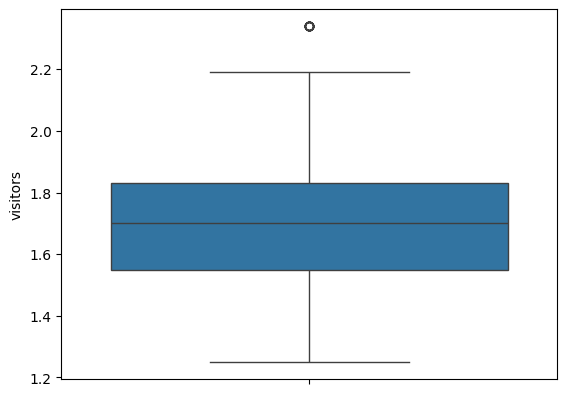

In [12]:
sns.boxplot(df['visitors'])

**Observations:**
*  Median: The median visitor count appears to be around 1.7 million.
* Outliers: There seem to be some outliers present on the higher end of the visitor counts, indicated by the individual data points beyond the upper whisker. This suggests that there might be a few content releases that attracted significantly higher visitor numbers than the typical content.
* Overall Distribution: The boxplot confirms that the distribution of visitor counts is slightly right-skewed as indicated in the histogram. The median is slightly towards the left side of the box, suggesting the presence of a tail on the right, or higher end of the distribution.


In [13]:
# ad_impressions

df['ad_impressions'].describe()

,ad_impressions
count,1000.000000
mean,1434.712290
std,289.534834
min,1010.870000
25%,1210.330000
50%,1383.580000
75%,1623.670000
max,2424.200000


<Axes: xlabel='ad_impressions', ylabel='Count'>

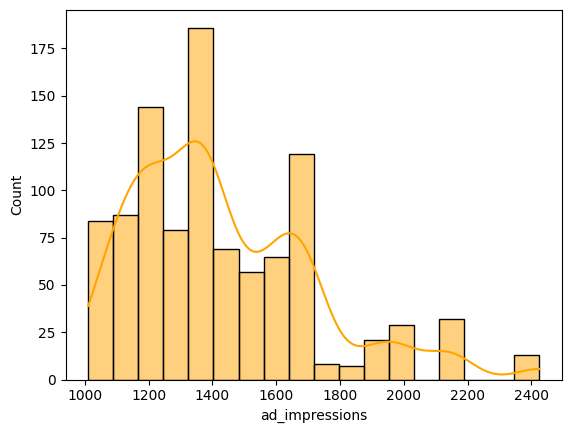

In [14]:
sns.histplot(df['ad_impressions'], kde=True, color='orange') #ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)

**Observations:**

* Right-skewed distribution with most values between 1000 and 1500.
Peaks around 1200 and 1400.
* Long tail extends up to 2400, indicating fewer high-impression campaigns.
* Potential outliers in the higher range, confirmed by the boxplot.


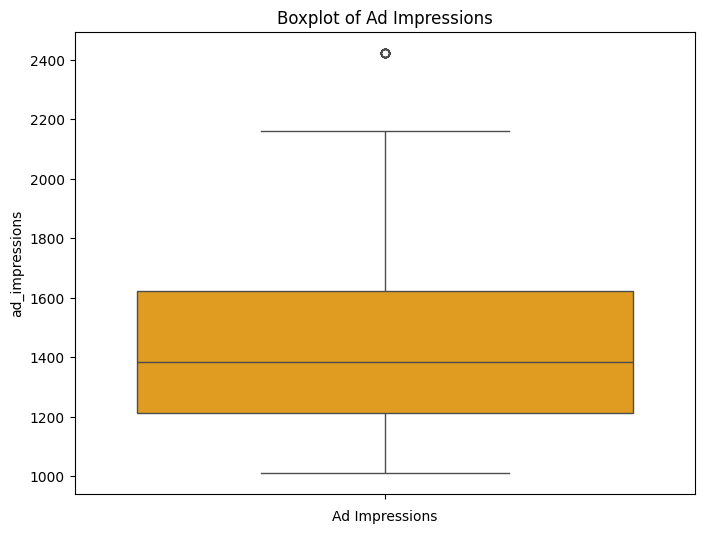

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(df['ad_impressions'], color = 'orange')
plt.title('Boxplot of Ad Impressions')
plt.xlabel('Ad Impressions')
plt.show()

In [16]:
# major_sports_event

df['major_sports_event'].value_counts()

,count
major_sports_event,
0,600
1,400


For 400 entries there is any major sports event scheduled and the value is false for 600 rows.

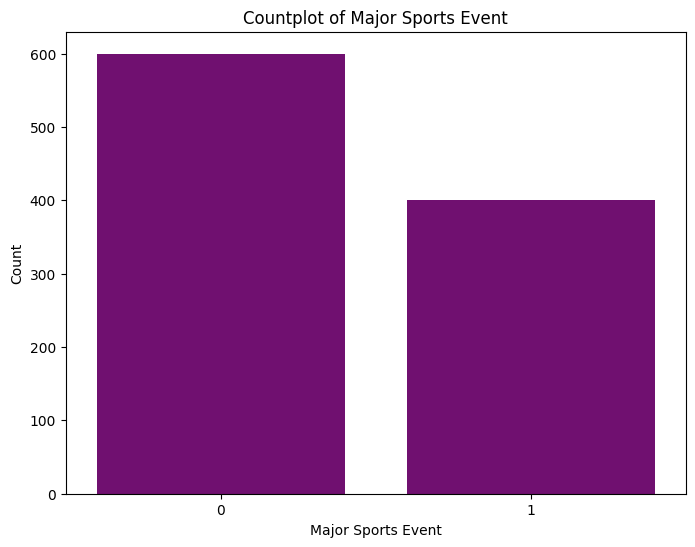

In [17]:
plt.figure(figsize=(8, 6))
sns.countplot(x='major_sports_event', data=df, color = 'purple')
plt.title('Countplot of Major Sports Event')
plt.xlabel('Major Sports Event')
plt.ylabel('Count')
plt.show()

**Observations:**
* The countplot shows that there are significantly more instances (600) where there was no major sports event occurring on the release date of the content.
* This suggests that the occurrence of major sports events may not be a very frequent phenomenon impacting the first-day viewership.
However, it is still important to analyze the impact of major sports events on the content's viewership to understand if it significantly affects the views, especially when there is a major event scheduled.

In [18]:
# dayofweek

df['dayofweek'].value_counts()

,count
dayofweek,
Friday,369
Wednesday,332
Thursday,97
Saturday,88
Sunday,67
Monday,24
Tuesday,23


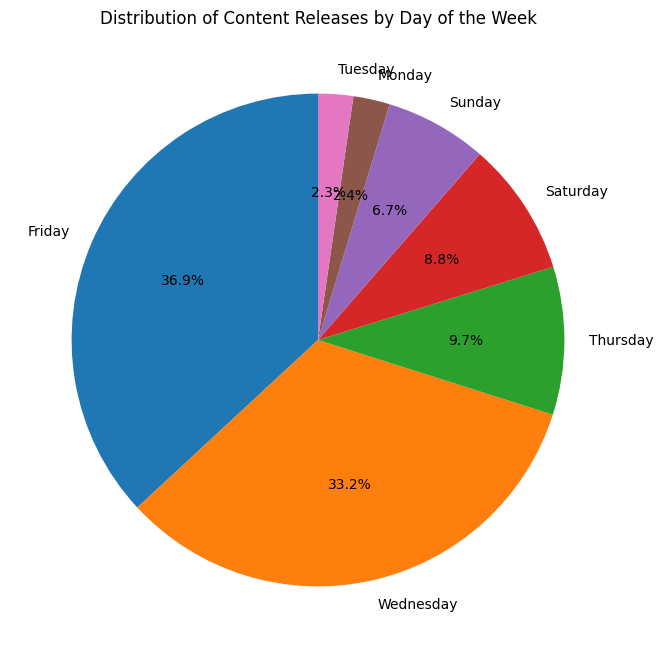

In [19]:
day_counts = df['dayofweek'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Content Releases by Day of the Week')
plt.show()

**Observations:**
* Majority of content releases are on Fridays followed by Wednesday.
* The least number of releases are on Mondays and Tuesdays, indicating that the viewers peak at weekends.

In [20]:
# season

df['season'].value_counts()

,count
season,
Winter,257
Fall,252
Spring,247
Summer,244


<Axes: xlabel='season', ylabel='count'>

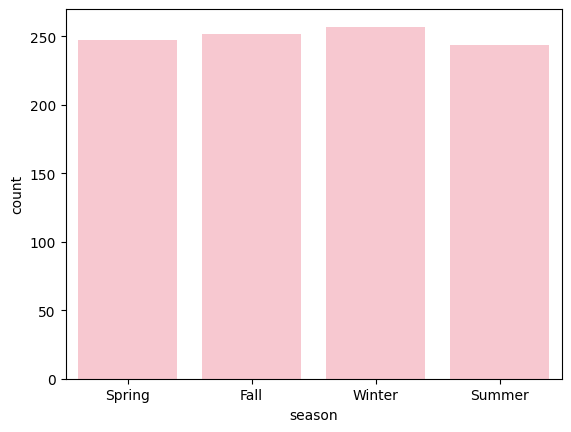

In [21]:
sns.countplot(x='season', data=df, color = 'pink')

**Observations:**
* The content release is high in Winter and Summer seasons.
* The least content release is in Fall and spring seasons.
* This might be because of the change in the viewer's preference for content during the seasons.

In [22]:
# views_trailer

df['views_trailer'].describe()



,views_trailer
count,1000.00000
mean,66.91559
std,35.00108
min,30.08000
25%,50.94750
50%,53.96000
75%,57.75500
max,199.92000


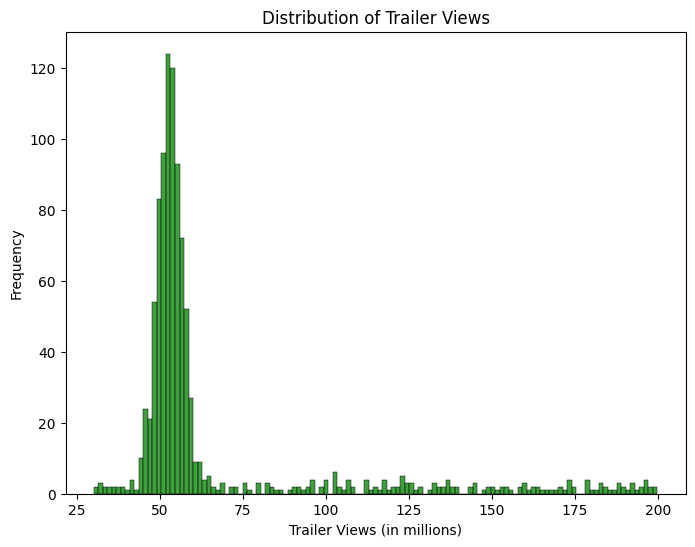

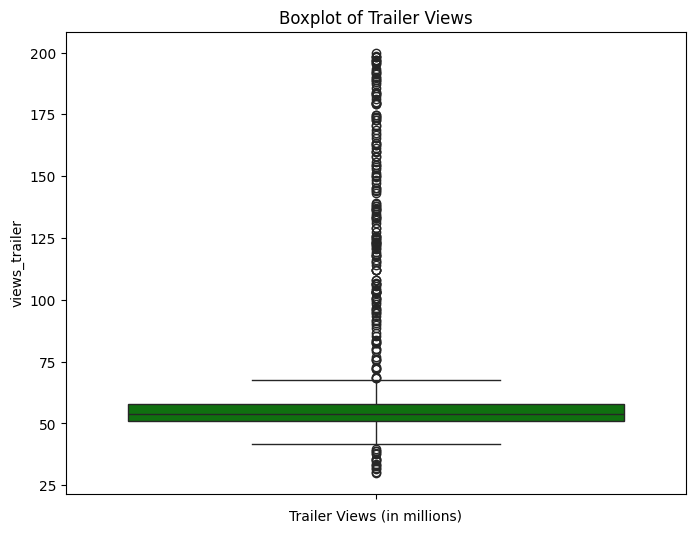

In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['views_trailer'], color='green')
plt.title('Distribution of Trailer Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['views_trailer'], color='green')
plt.title('Boxplot of Trailer Views')
plt.xlabel('Trailer Views (in millions)')
plt.show()

**Observations:**

* Central Tendency: The median trailer views are approximately 53.96 million, with a mean of 66.91 million.
* The distribution of trailer views is right-skewed,  with the majority of the data concentrated between 50 million and 75 million views, indicating that a majority of content has a lower number of trailer views, while a few have significantly higher numbers.
* Outliers: The boxplot shows a significant number of outliers beyond 75 million views, with a maximum value of 199.92 million. These outliers represent content with significantly higher trailer views, potentially due to popularity or extensive marketing efforts.
* Analyzing the correlation between trailer views and first-day content views can reveal whether effective trailer promotion impacts the overall viewership.

In [24]:
# genre

df['genre'].value_counts()

,count
genre,
Others,255
Comedy,114
Thriller,113
Drama,109
Romance,105
Sci-Fi,102
Horror,101
Action,101


<Axes: xlabel='genre', ylabel='count'>

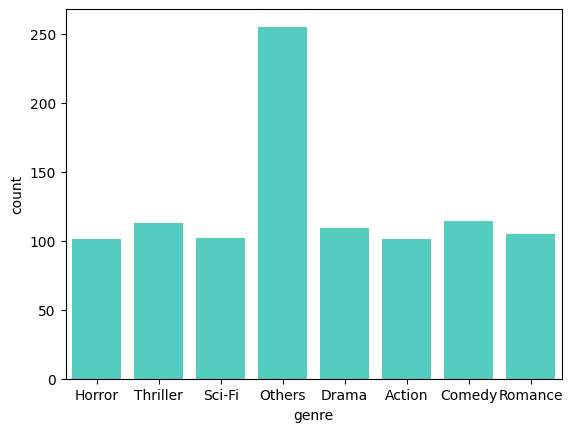

In [25]:
sns.countplot(x='genre', data=df, color='turquoise')

In [26]:
#Removing the 'Others' category from genre column since it is non-specific information and may cause potential multicolinearity

df = df[df['genre'] != 'Others']

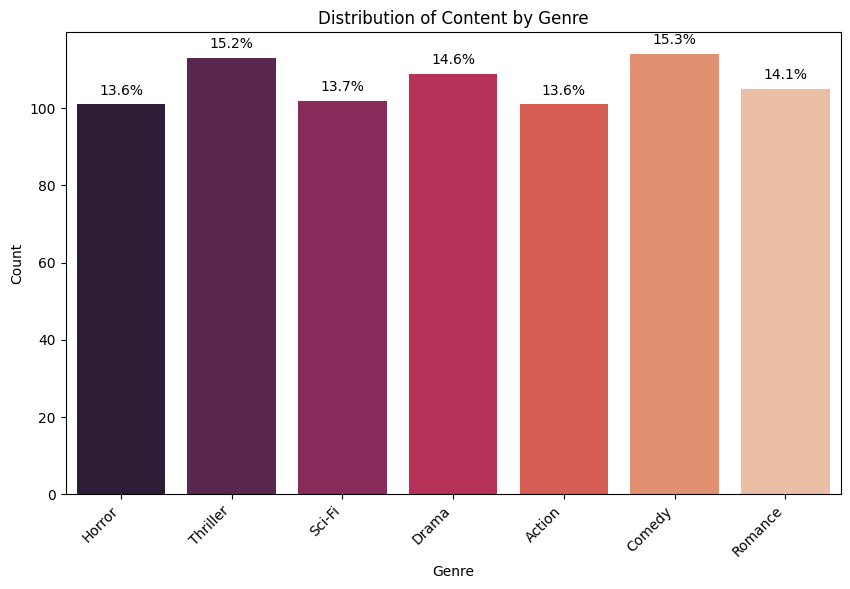

In [27]:
total = len(df)
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='genre', data=df, palette='rocket')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')
plt.title('Distribution of Content by Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**
* Comedy appears to be the most popular genre, with the highest number of content releases, followed by Thriller and Drama
* Action, Horror, and Sci-Fi have a relatively lower number of content releases.
* Understanding the popularity of different genres can help in content strategy.

In [28]:
# views_content

df['views_content'].describe()

,views_content
count,745.000000
mean,0.478067
std,0.108606
min,0.220000
25%,0.410000
50%,0.460000
75%,0.530000
max,0.890000


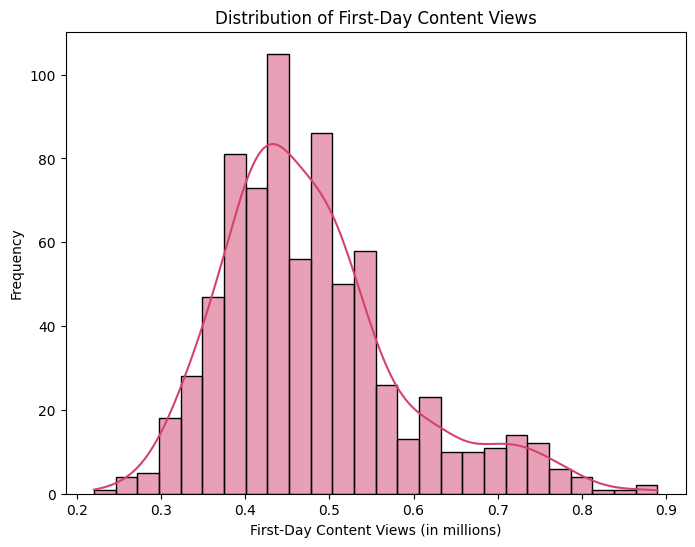

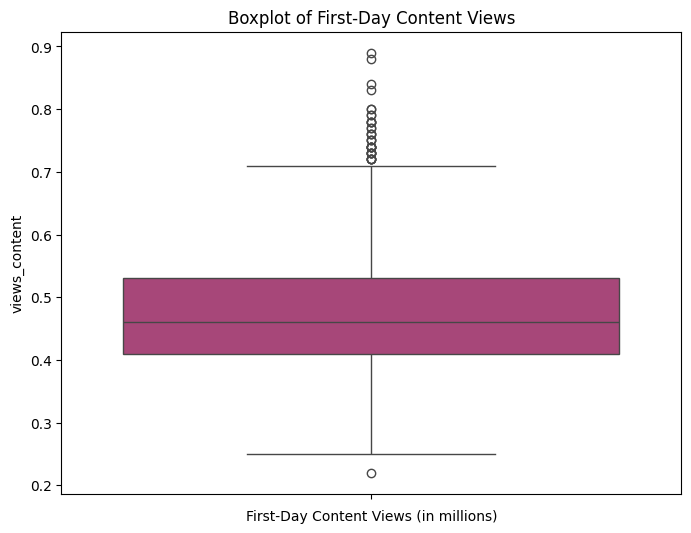

In [29]:
plt.figure(figsize=(8, 6))
sns.histplot(df['views_content'], kde=True, color=sns.color_palette('magma')[3])
plt.title('Distribution of First-Day Content Views')
plt.xlabel('First-Day Content Views (in millions)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(df['views_content'], palette='magma')
plt.title('Boxplot of First-Day Content Views')
plt.xlabel('First-Day Content Views (in millions)')
plt.show()

**Observations:**

* The distribution of first-day content views is right-skewed, indicating that a majority of content has a lower number of views, while a few have significantly higher numbers.
* The histogram shows the concentration of content views in lower ranges.
* The boxplot reveals the presence of outliers on the higher end of the distribution. These outliers represent content with significantly higher first-day views, potentially due to popularity, strong marketing, or other factors.
* Analyzing the correlation between trailer views and first-day content views can reveal whether effective trailer promotion impacts the overall viewership.


**Bivariate Analysis and Key Questions**

**visitors vs views_content**

Correlation between Visitors and First-Day Content Views: 0.2695593722318998


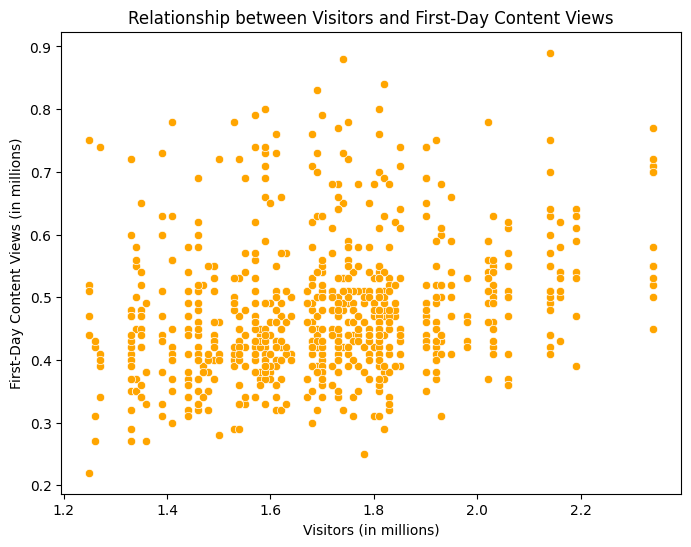

In [30]:
correlation = df['visitors'].corr(df['views_content'])
print(f"Correlation between Visitors and First-Day Content Views: {correlation}")

# Scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.scatterplot(x='visitors', y='views_content', data=df, color='orange')
plt.title('Relationship between Visitors and First-Day Content Views')
plt.xlabel('Visitors (in millions)')
plt.ylabel('First-Day Content Views (in millions)')
plt.show()


There is no relation between the visitors on the platform and first day content views

**major_sports_event vs views_content**

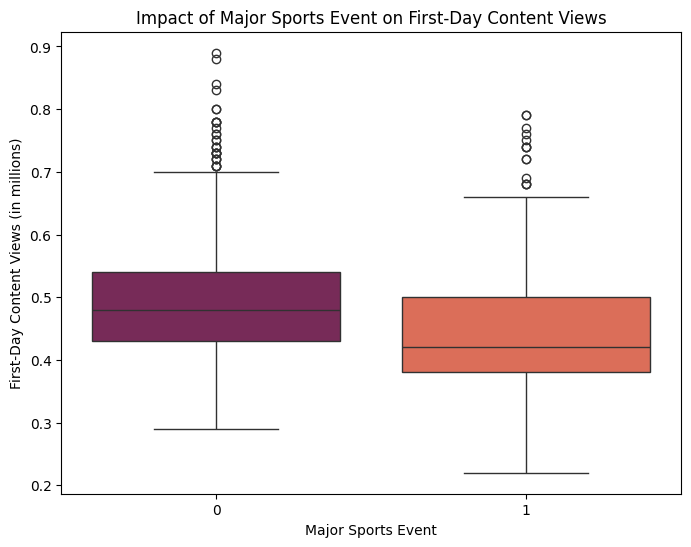

major_sports_event
0    0.499302
1    0.446744
Name: views_content, dtype: float64


In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='major_sports_event', y='views_content', data=df, palette='rocket')
plt.title('Impact of Major Sports Event on First-Day Content Views')
plt.xlabel('Major Sports Event')
plt.ylabel('First-Day Content Views (in millions)')
plt.show()

# Grouped mean of views_content by major_sports_event
views_by_sports_event = df.groupby('major_sports_event')['views_content'].mean()
print(views_by_sports_event)


**Observations:**
* The box plot  and mean 0.446744 implies that the occurrence of a major sports event has a considerable impact on the first-day content viewership.

**genre vs views_content**

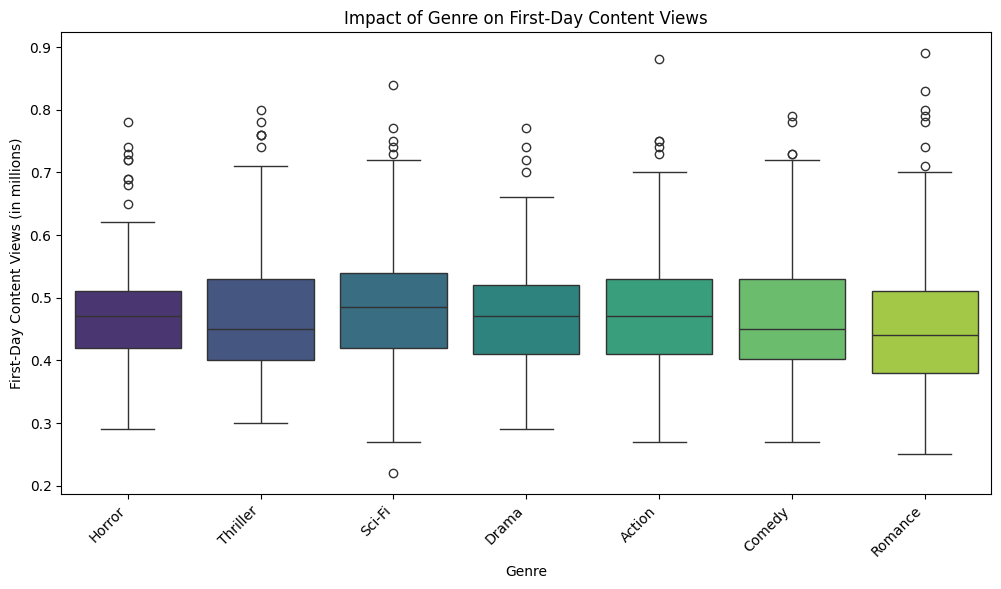

genre
Action      0.487327
Comedy      0.474211
Drama       0.473945
Horror      0.481089
Romance     0.461238
Sci-Fi      0.493235
Thriller    0.476903
Name: views_content, dtype: float64


In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='genre', y='views_content', data=df, palette='viridis')
plt.title('Impact of Genre on First-Day Content Views')
plt.xlabel('Genre')
plt.ylabel('First-Day Content Views (in millions)')
plt.xticks(rotation=45, ha='right')
plt.show()

# Grouped mean of views_content by genre
views_by_genre = df.groupby('genre')['views_content'].mean()
print(views_by_genre)

**Observations:**

* The box plot shows that different genres have different impacts on first-day content views.
* Sci-Fi has the highest mean viewership.
* Romance has the lowest mean viewership.
* Understanding the popularity of different genres can help in content strategy.

**views_content vs views_trailer**

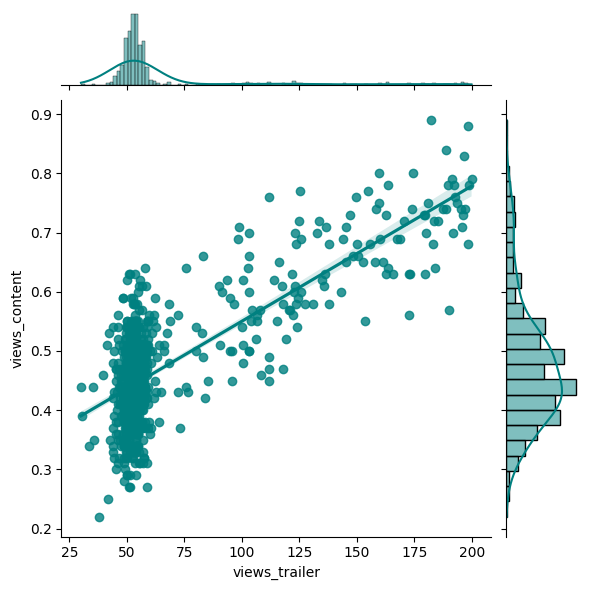

In [33]:
sns.jointplot(x='views_trailer', y='views_content',data=df, kind='reg', color='teal')
plt.show()

**Observations:**

* Positive Correlation: There appears to be a positive correlation between views_trailer and views_content, indicating that as trailer views increase, content views tend to increase as well.
*  Dense Cluster: A large number of data points are clustered at lower values of both views_trailer (around 50 million) and views_content (around 0.4), indicating a common viewership range.
* Outliers: There are some scattered points with much higher values for views_trailer, suggesting that a few trailers had significantly more views than the majority.
* Linear Fit: The regression line indicates a moderately strong linear relationship, but there is still some spread of data points around the line, showing variability in how trailer views translate to content views.
* KDE and Histogram: The marginal distributions (histogram and KDE) show the distribution of trailer views and content views. Both seem to have a right-skewed distribution, indicating that most trailers have fewer views, with a few having significantly higher views.

**The day of the week on which content is released generally plays a key role in the viewership. How does the viewership vary with the day of release?**

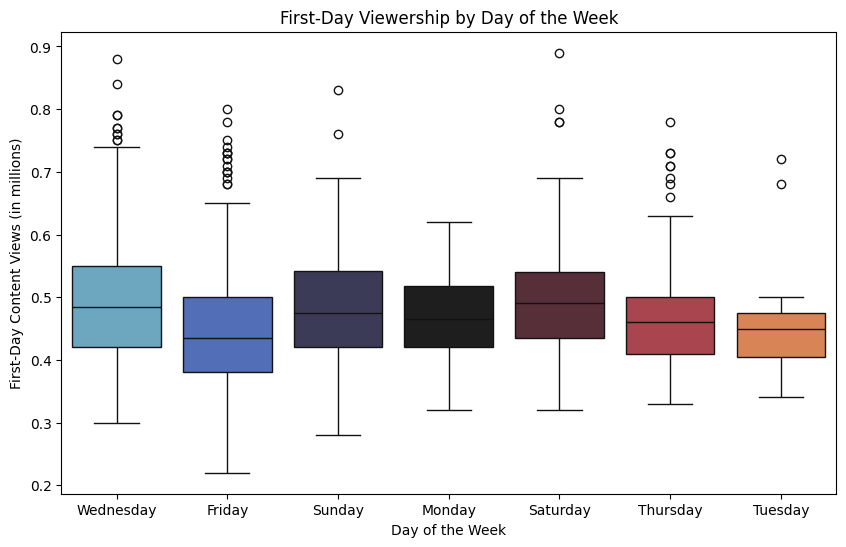

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayofweek', y='views_content', data=df, palette='icefire')
plt.title('First-Day Viewership by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('First-Day Content Views (in millions)')
plt.show()

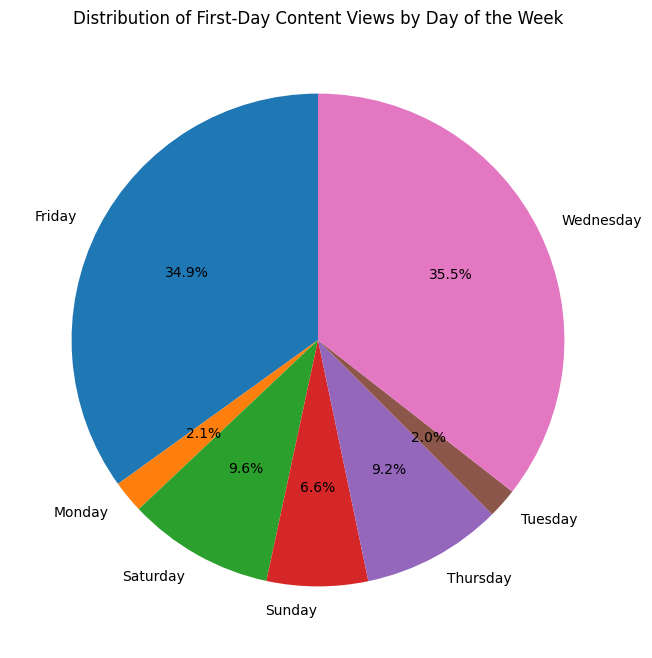

In [35]:
views_by_day = df.groupby('dayofweek')['views_content'].sum()

plt.figure(figsize=(8, 8))
plt.pie(views_by_day, labels=views_by_day.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of First-Day Content Views by Day of the Week')
plt.show()

**Observations:**
* The boxplot reveals that the median first-day viewership is generally higher on weekends (Saturday, and Sunday) compared to weekdays.
This suggests that viewers are more likely to watch content on ShowTime during weekends, potentially due to increased leisure time.
* Content released on weekdays like Monday and Tuesday tends to have lower viewership on the first day, as indicated by the lower median and quartiles.
* There are also more outliers on the weekends, suggesting that there are certain instances of content released on weekends that have unusually high first-day viewership.



**How does the viewership vary with the season of release?**

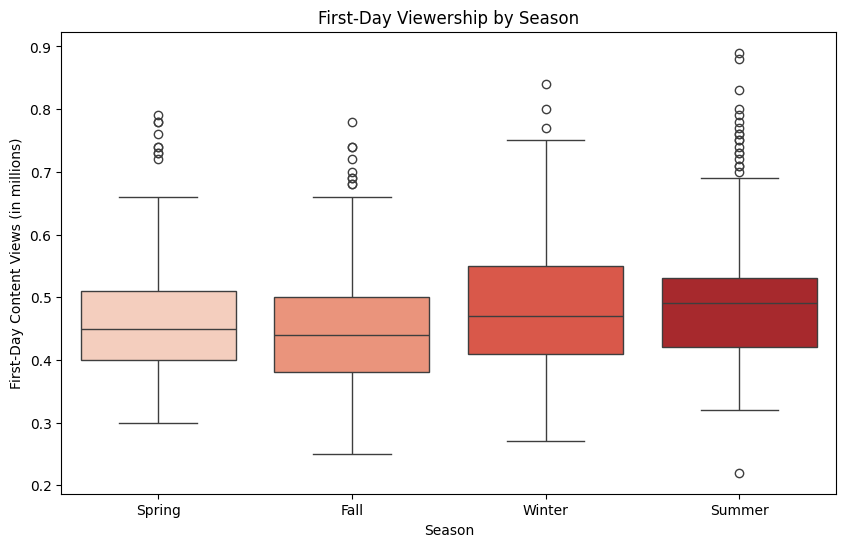

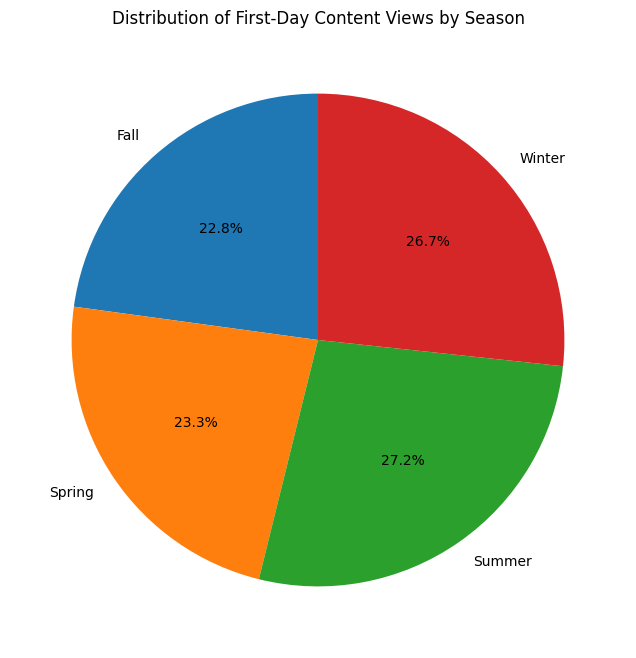

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='views_content', data=df, palette='Reds')
plt.title('First-Day Viewership by Season')
plt.xlabel('Season')
plt.ylabel('First-Day Content Views (in millions)')
plt.show()

views_by_season = df.groupby('season')['views_content'].sum()

plt.figure(figsize=(8, 8))
plt.pie(views_by_season, labels=views_by_season.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of First-Day Content Views by Season')
plt.show()

**Observations:**

* Summer and Winter seasons tend to have a higher median first-day viewership compared to Fall and Spring
* This suggests that viewers might be more inclined to watch content on ShowTime during these seasons, potentially due to factors like weather or seasonal preferences
* There's also a noticeable difference in the distribution of viewership across different seasons, with Winter having a slightly wider range, suggesting more variability
* Further analysis could delve into the content type released during each season and user behavior in different seasons to understand this pattern better


**What is the correlation between trailer views and content views?**

In [37]:
correlation = df['views_trailer'].corr(df['views_content'])
print(f"Correlation between trailer views and content views: {correlation}")

Correlation between trailer views and content views: 0.7695585029879136


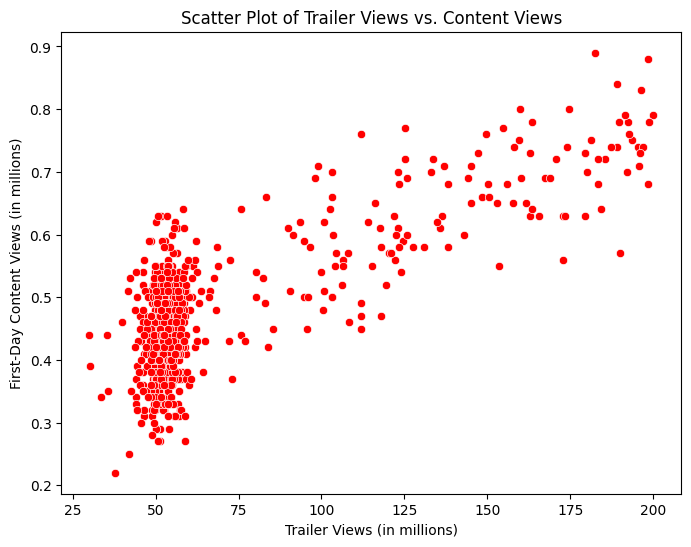

In [38]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='views_trailer', y='views_content', data=df, color='red')
plt.title('Scatter Plot of Trailer Views vs. Content Views')
plt.xlabel('Trailer Views (in millions)')
plt.ylabel('First-Day Content Views (in millions)')
plt.show()

**Observations:**

* The Scatter plot suggests there is a strong positive correlation between trailer views and content views
* This suggests that higher trailer viewership is associated with higher first-day content viewership
* Promoting content effectively through trailers can potentially drive increased viewership

**daysofweek vs genre**

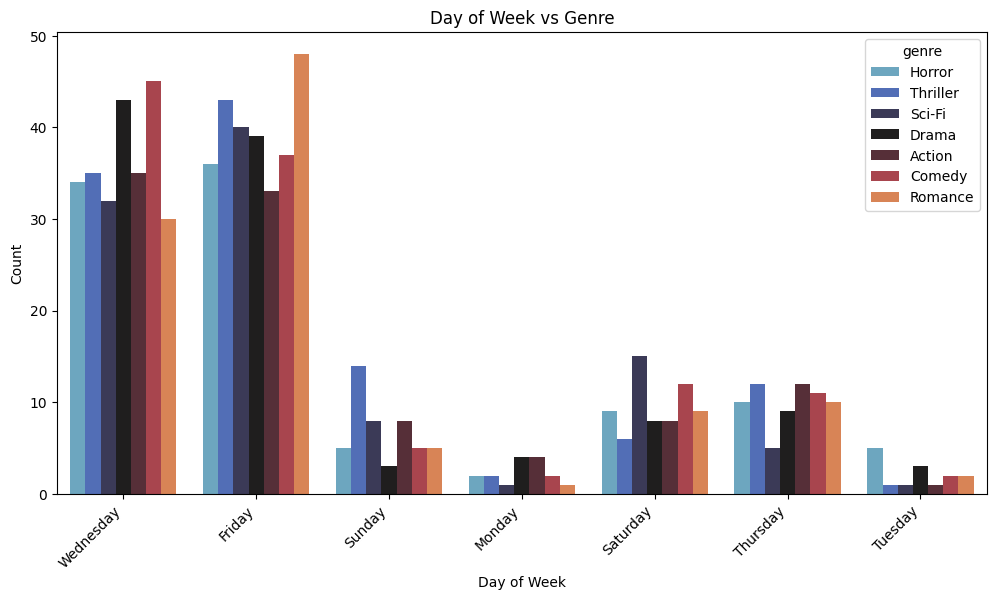

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='dayofweek', hue='genre', data=df, palette='icefire')
plt.title('Day of Week vs Genre')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

**Observations:**
* Certain genres appear to be more popular on specific days of the week.
  Romance is the most popular genre on Fridays where as Horror is most popular on Tuesdays.
* The content scheduling strategy can be explored to align with the popularity of different genres on different days.
* Analyzing patterns between genre and day of the week can help optimize content releases for maximum viewership.

In [40]:
df_num = df.select_dtypes(include=np.number)

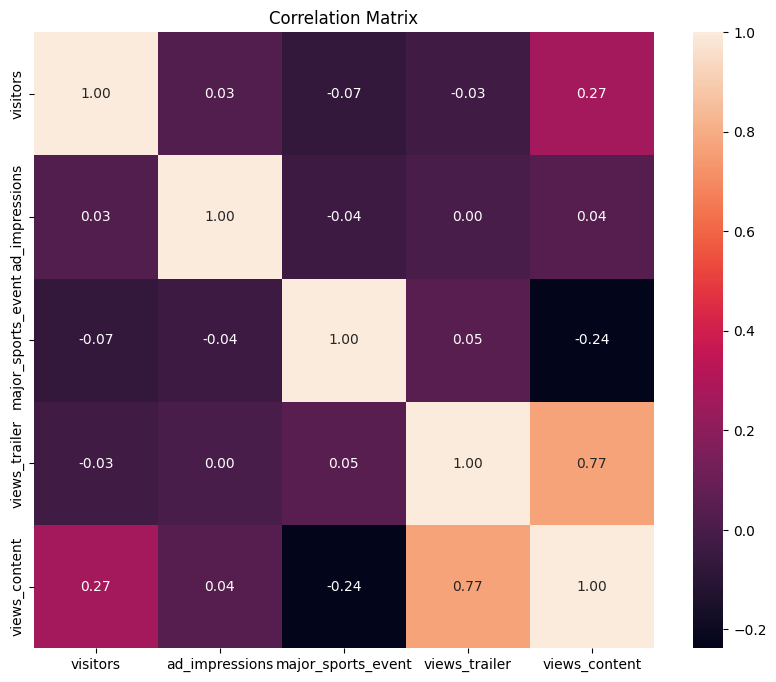

In [41]:
correlation_matrix = df_num.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

**Observations:**

* views_trailer and views_content have a strong positive correlation, suggesting that more trailer views lead to more content views.
* ad_impressions and views_content also show a moderate positive correlation.
* There is no significant correlation between visitors and views_content, indicating that the number of visitors on the platform does not necessarily influence first-day viewership.

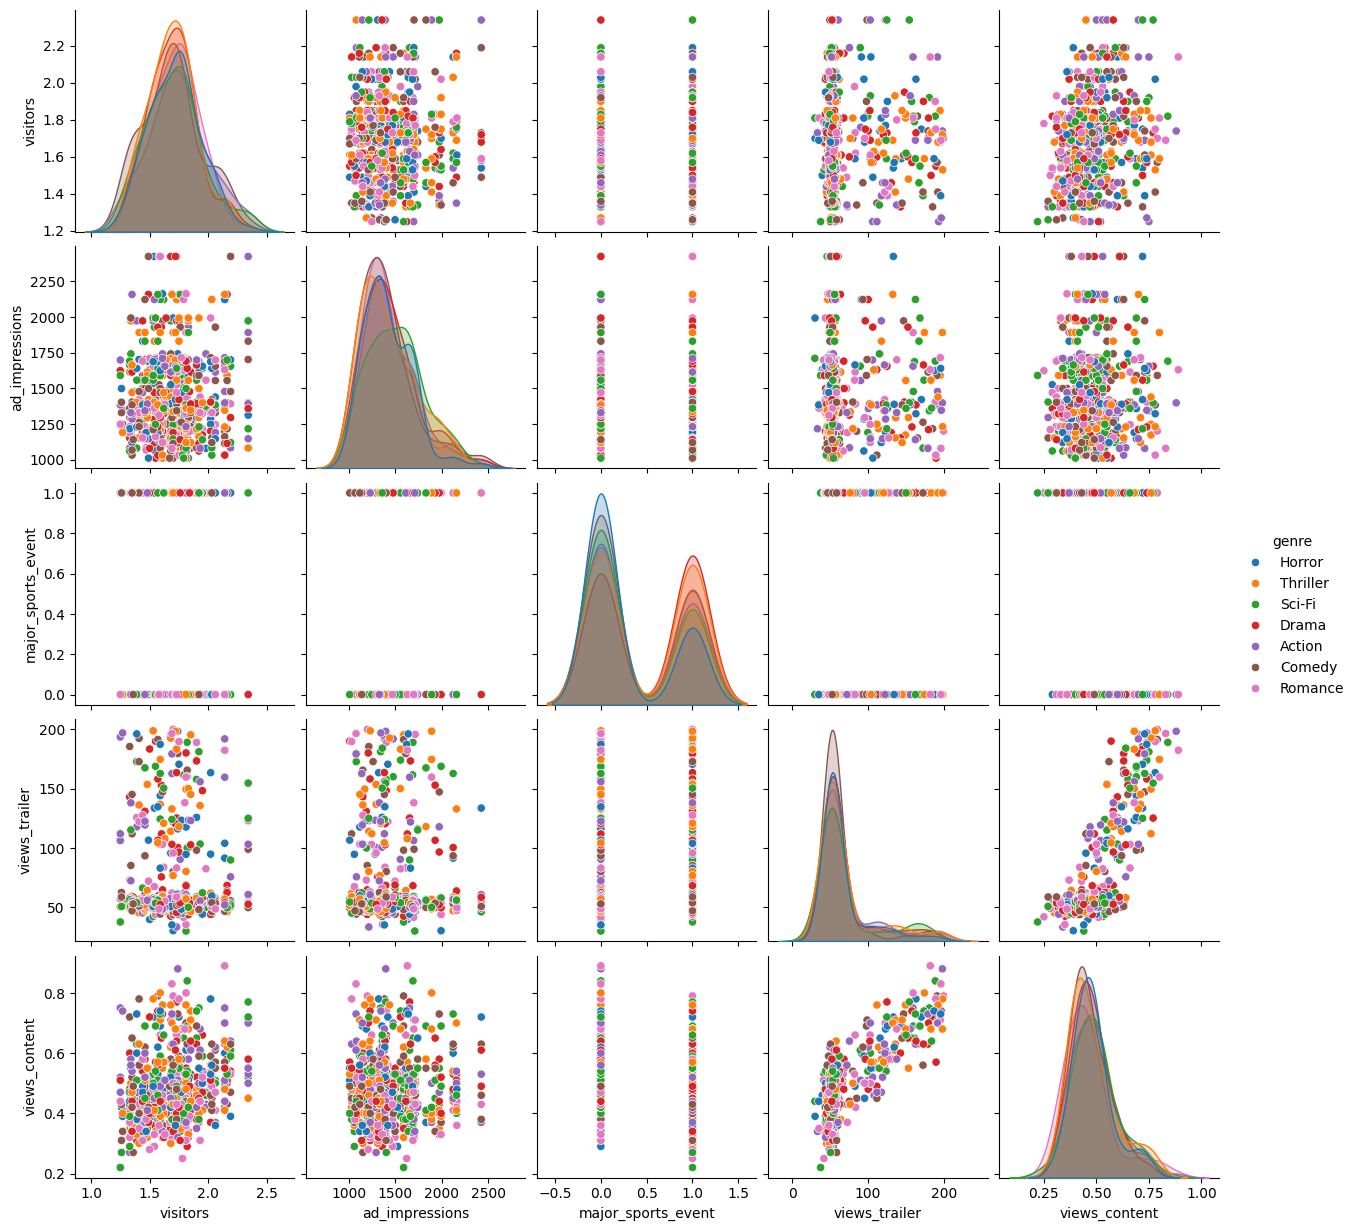

In [42]:
sns.pairplot(df, hue='genre', diag_kind='auto')
plt.show()

# **Data Preprocessing**

**Checking for Missing values**

In [43]:
df.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
genre,0
dayofweek,0
season,0
views_trailer,0
views_content,0


There are no missing values in the data

**Checking for Duplicates**

In [44]:
if df.duplicated().sum() == 0:
    print("No duplicate rows found in the dataset.")
else:
    print(f"{df.duplicated().sum()} duplicate rows found.")


No duplicate rows found in the dataset.


There are no duplicate entries in the data

**Outlier Detection and Treatment**

In [45]:
df_num = df.select_dtypes(include=[np.number])

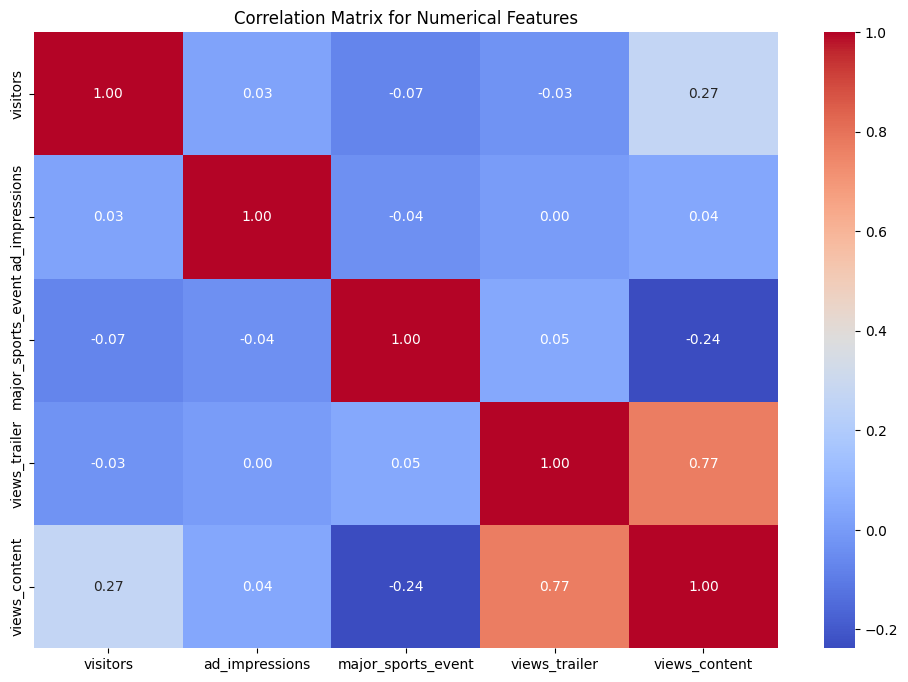

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Features')
plt.show()

In [47]:
df_num.columns

Index(['visitors', 'ad_impressions', 'major_sports_event', 'views_trailer',
       'views_content'],
      dtype='object')

<Axes: ylabel='views_trailer'>

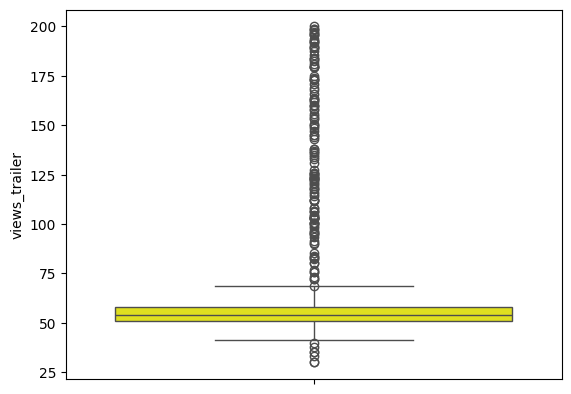

In [133]:
sns.boxplot(df_num['views_trailer'], color='yellow')

In [49]:
Q1 = df_num['views_trailer'].quantile(0.25)
Q3 = df_num['views_trailer'].quantile(0.75)
IQR = Q3 - Q1
print(f"IQR for views_trailer: {IQR}")

IQR for views_trailer: 7.109999999999999


In [50]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
outliers = df_num[(df_num['views_trailer']<lower_bound)| (df_num['views_trailer']>upper_bound)]

Since the dataset contains only 1000 rows and outliers are 14.6% in the views_trailer column, we cannot directly remove them as that would lead to loss of significant amount of data. We can cap the extreme values with lower and upper bounds but this can be done after generating the linear model with these outliers for comparison

<Axes: ylabel='views_content'>

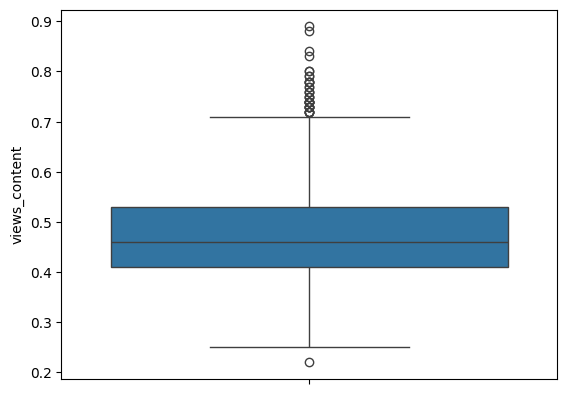

In [51]:
sns.boxplot(df_num['views_content'])

The target column, views_content also contains outliers at the higher end. Let us build the model and test how these outliers affect the model's performance and then a decision may be taken

**Converting the categorical variables to numerical using One-Hot Encoding**

In [52]:
df_encoded = pd.get_dummies(df, columns=['genre', 'dayofweek', 'season'], drop_first=True)
df_encoded

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,False,False,True,False,False,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,1,52.69,0.32,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,1,48.74,0.39,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,1,49.81,0.44,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,0,55.83,0.46,False,False,False,False,True,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.58,1311.96,0,48.58,0.36,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
996,1.34,1329.48,0,72.42,0.56,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
997,1.62,1359.80,1,150.44,0.66,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False
998,2.06,1698.35,0,48.72,0.47,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False


In [134]:
df_encoded.isnull().sum()

,0
visitors,0
ad_impressions,0
major_sports_event,0
views_trailer,0
views_content,0
genre_Comedy,0
genre_Drama,0
genre_Horror,0
genre_Romance,0
genre_Sci-Fi,0


In [54]:
bool_columns = df_encoded.select_dtypes(include=['bool']).columns
df_encoded[bool_columns] = df_encoded[bool_columns].astype(int)

In [55]:
df_encoded.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,genre_Comedy,genre_Drama,genre_Horror,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,52.69,0.32,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,48.74,0.39,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,49.81,0.44,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,55.83,0.46,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


# **Model Building and Performance Evaluation**

In [56]:
X = df_encoded.drop('views_content', axis=1)
y = df_encoded['views_content']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [58]:
X_train

,visitors,ad_impressions,major_sports_event,views_trailer,genre_Comedy,genre_Drama,genre_Horror,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
56,1.62,1113.81,1,57.73,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1
86,1.54,1928.85,1,53.19,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0
212,1.73,1698.35,1,55.24,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
914,1.39,1639.83,0,196.11,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
341,1.81,1698.35,0,44.61,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,1.76,1498.41,1,52.14,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0
140,1.81,1359.80,0,49.56,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
347,1.57,1359.80,1,48.73,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
558,2.14,1031.85,0,53.40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [60]:
y_pred = model1.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [62]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0022298822795800695
R-squared: 0.7870991726238141


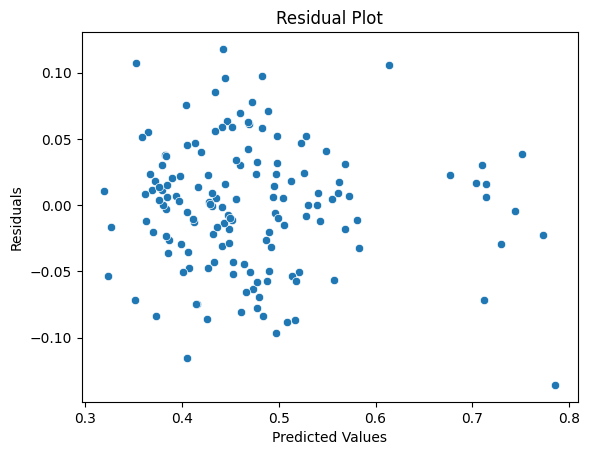

In [63]:
residuals = y_test - y_pred
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [64]:
import statsmodels.api as sm

X_train_with_const = sm.add_constant(X_train)
model_1 = sm.OLS(y_train, X_train_with_const).fit()

print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     129.1
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          3.02e-193
Time:                        11:36:54   Log-Likelihood:                 964.92
No. Observations:                 596   AIC:                            -1890.
Df Residuals:                     576   BIC:                            -1802.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0454    

**Checking the Linear Regression Assumptions**

**Checking and treating for Multicolinearity**

In [65]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series([variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])], index=X_train.columns)
print(vif_series1)

visitors               25.350665
ad_impressions         19.910671
major_sports_event      1.748239
views_trailer           4.428524
genre_Comedy            2.039412
genre_Drama             2.067762
genre_Horror            1.923219
genre_Romance           1.896181
genre_Sci-Fi            1.891473
genre_Thriller          2.157967
dayofweek_Monday        1.076705
dayofweek_Saturday      1.294287
dayofweek_Sunday        1.222497
dayofweek_Thursday      1.309072
dayofweek_Tuesday       1.085740
dayofweek_Wednesday     2.016269
season_Spring           2.061399
season_Summer           2.293212
season_Winter           2.296038
dtype: float64


visitors and ad_impressions have high VIF (i.e., 25 and 19 respectively), which is greater than 5. let us drop one column at a time and check the affects on the linear model

In [66]:
X_train_2 = X_train.drop('visitors', axis=1)
X_test_2 = X_test.drop('visitors', axis=1)

In [67]:
model2 = LinearRegression()
model2.fit(X_train_2, y_train)
y_pred_2 = model2.predict(X_test_2)

In [68]:
mse_2 = mean_squared_error(y_test, y_pred_2)
r2_2 = r2_score(y_test, y_pred_2)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0022298822795800695
R-squared: 0.7870991726238141


In [69]:
X_train_2_with_const = sm.add_constant(X_train_2)
model_2 = sm.OLS(y_train, X_train_2_with_const).fit()

print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     91.21
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          2.16e-155
Time:                        11:36:54   Log-Likelihood:                 871.59
No. Observations:                 596   AIC:                            -1705.
Df Residuals:                     577   BIC:                            -1622.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2775    

In [70]:
vif_series2 = pd.Series([variance_inflation_factor(X_train_2.values, i) for i in range(X_train_2.shape[1])], index=X_train_2.columns)
print(vif_series2)

ad_impressions         10.981114
major_sports_event      1.732867
views_trailer           4.246602
genre_Comedy            1.926908
genre_Drama             1.967663
genre_Horror            1.785100
genre_Romance           1.786810
genre_Sci-Fi            1.831830
genre_Thriller          2.029663
dayofweek_Monday        1.069227
dayofweek_Saturday      1.269845
dayofweek_Sunday        1.206321
dayofweek_Thursday      1.305408
dayofweek_Tuesday       1.069033
dayofweek_Wednesday     1.970520
season_Spring           1.992108
season_Summer           2.146028
season_Winter           2.197232
dtype: float64


In [71]:
X_train_3 = X_train_2.drop('ad_impressions', axis=1)
X_test_3= X_test_2.drop('ad_impressions', axis=1)

model3 = LinearRegression()
model3.fit(X_train_3, y_train)
y_pred_3 = model3.predict(X_test_3)

In [72]:
mse_3 = mean_squared_error(y_test, y_pred_3)
r2_3 = r2_score(y_test, y_pred_3)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.0022298822795800695
R-squared: 0.7870991726238141


In [73]:
X_train_3_with_const = sm.add_constant(X_train_3)
model_3 = sm.OLS(y_train, X_train_3_with_const).fit()

print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     96.60
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          2.97e-156
Time:                        11:36:54   Log-Likelihood:                 871.26
No. Observations:                 596   AIC:                            -1707.
Df Residuals:                     578   BIC:                            -1627.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2870    

In [74]:
vif_series3 = pd.Series([variance_inflation_factor(X_train_3.values, i) for i in range(X_train_3.shape[1])], index=X_train_3.columns)
print(vif_series3)

major_sports_event     1.703948
views_trailer          3.700282
genre_Comedy           1.632763
genre_Drama            1.706777
genre_Horror           1.437343
genre_Romance          1.483208
genre_Sci-Fi           1.561529
genre_Thriller         1.664618
dayofweek_Monday       1.060028
dayofweek_Saturday     1.255065
dayofweek_Sunday       1.181248
dayofweek_Thursday     1.300436
dayofweek_Tuesday      1.060892
dayofweek_Wednesday    1.899641
season_Spring          1.825379
season_Summer          1.821019
season_Winter          1.920524
dtype: float64


* There is no multicolinearity in the data after removing 'visitors' variable but the R-squared value reduced to 74 from 78
* Since the objective of this analysis is to is to identify and quantify the key factors influencing the first-day viewership of content, Interpretability is prioritized over the Model's Prediction power.

In [75]:
df_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_3})
df_pred['Residuals'] = df_pred['Actual'] - df_pred['Predicted']
df_pred.head()

,Actual,Predicted,Residuals
267,0.41,0.433137,-0.023137
335,0.70,0.713547,-0.013547
128,0.74,0.717116,0.022884
192,0.40,0.429714,-0.029714
502,0.40,0.473874,-0.073874


**Checking for Linearity**

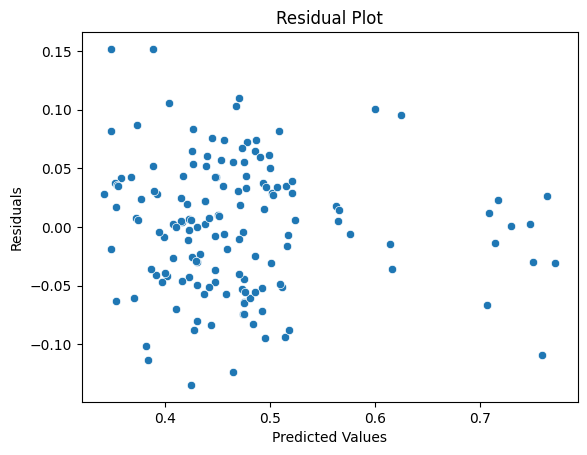

In [76]:
residuals_3 = y_test - y_pred_3
sns.scatterplot(x=y_pred_3, y=residuals_3)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

There is no pattern in the plot. It is evident that there is Linearity in the data

**Testing for Normality**

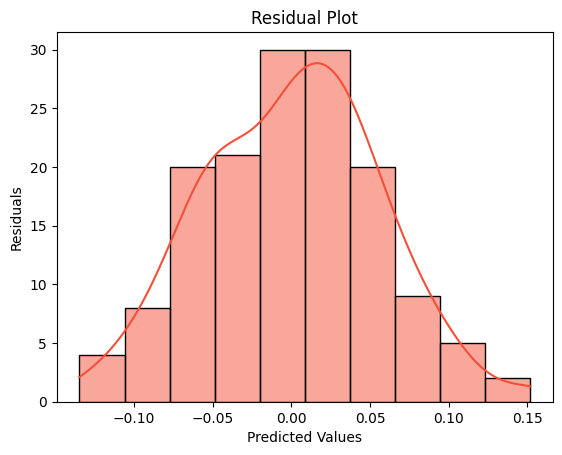

In [77]:
sns.histplot(residuals_3, kde=True, color=sns.color_palette('Reds')[3])
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

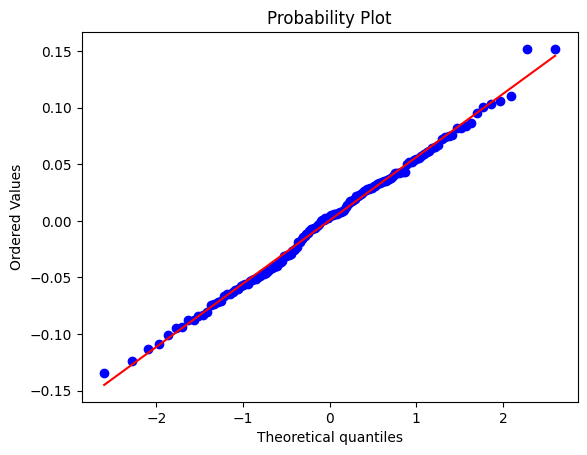

In [78]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist='norm', plot=pylab)
plt.show()

Even though not perfect, we can still say that the Residuals are normally distributed

**Checking for Homoscedacity**

In [79]:
print(df_pred['Residuals'].dtypes)
print(X_test_3.dtypes)

float64
major_sports_event       int64
views_trailer          float64
genre_Comedy             int64
genre_Drama              int64
genre_Horror             int64
genre_Romance            int64
genre_Sci-Fi             int64
genre_Thriller           int64
dayofweek_Monday         int64
dayofweek_Saturday       int64
dayofweek_Sunday         int64
dayofweek_Thursday       int64
dayofweek_Tuesday        int64
dayofweek_Wednesday      int64
season_Spring            int64
season_Summer            int64
season_Winter            int64
dtype: object


In [80]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_goldfeldquandt
from statsmodels.compat import lzip

In [81]:
name = ["F statistic", "p-value"]
test = het_goldfeldquandt(df_pred['Residuals'], X_test_3)
lzip(name, test)

[('F statistic', 0.9067517483718142), ('p-value', 0.6443661965169047)]

Since the p-value > 0.05, we can say that the residuals are homocedastic

**Let us now cap the outliers and check the model's performance**

In [82]:
for column in df_num.columns:
  Q1 = df_num[column].quantile(0.25)
  Q3 = df_num[column].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  outliers = df_num[(df_num[column] < lower_bound) | (df_num[column] > upper_bound)]
  outlier_percentage = (len(outliers) / len(df_num)) * 100
  print(f"Outlier percentage in {column}: {outlier_percentage:.2f}%")


Outlier percentage in visitors: 1.88%
Outlier percentage in ad_impressions: 1.34%
Outlier percentage in major_sports_event: 0.00%
Outlier percentage in views_trailer: 19.60%
Outlier percentage in views_content: 4.97%


In [136]:
df_without_outliers = df_encoded

def cap_outliers(df, views_content):
    # Calculating Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df_without_outliers[views_content].quantile(0.25)
    Q3 = df_without_outliers[views_content].quantile(0.75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_without_outliers[views_content] = df_without_outliers[views_content].clip(lower=lower_bound, upper=upper_bound)

    return df

df_without_outliers = cap_outliers(df_without_outliers, 'views_content')
df_without_outliers = cap_outliers(df_without_outliers, 'views_trailer')

print(df_without_outliers)


     visitors  ad_impressions  major_sports_event  views_trailer  \
0        1.67         1113.81                   0         56.700   
1        1.46         1498.41                   1         52.690   
2        1.47         1079.19                   1         48.740   
3        1.85         1342.77                   1         49.810   
4        1.46         1498.41                   0         55.830   
..        ...             ...                 ...            ...   
995      1.58         1311.96                   0         48.580   
996      1.34         1329.48                   0         68.805   
997      1.62         1359.80                   1         68.805   
998      2.06         1698.35                   0         48.720   
999      1.36         1140.23                   0         52.940   

     views_content  genre_Comedy  genre_Drama  genre_Horror  genre_Romance  \
0             0.51             0            0             1              0   
1             0.32         

<Axes: ylabel='views_trailer'>

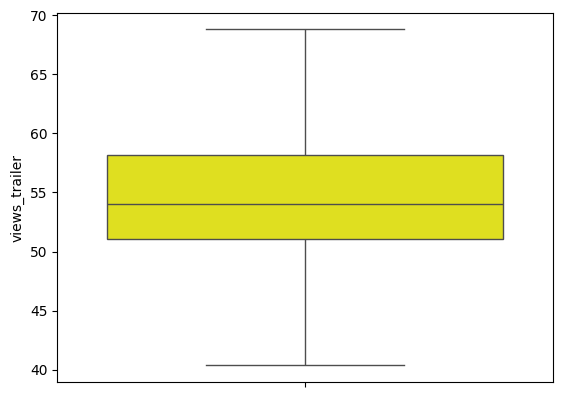

In [138]:
sns.boxplot(df_without_outliers['views_trailer'], color='yellow')

In [84]:
X_without_outliers = df_without_outliers.drop('views_content', axis=1)
y_without_outliers = df_without_outliers['views_content']

In [85]:
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers = train_test_split(X_without_outliers,y_without_outliers, test_size=0.2, random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression

model_without_outliers = LinearRegression()
model_without_outliers.fit(X_train_without_outliers,y_train_without_outliers)

LinearRegression()

In [87]:
y_pred_without_outliers = model_without_outliers.predict(X_test_without_outliers)

In [88]:
from sklearn.metrics import mean_squared_error, r2_score
mse_without_outliers = mean_squared_error(y_test_without_outliers, y_pred_without_outliers)
r2_without_outliers = r2_score(y_test_without_outliers, y_pred_without_outliers)

In [89]:
print(f"Mean Squared Error: {mse_without_outliers}")
print(f"R-squared: {r2_without_outliers}")

Mean Squared Error: 0.002211157096103402
R-squared: 0.771092293079915


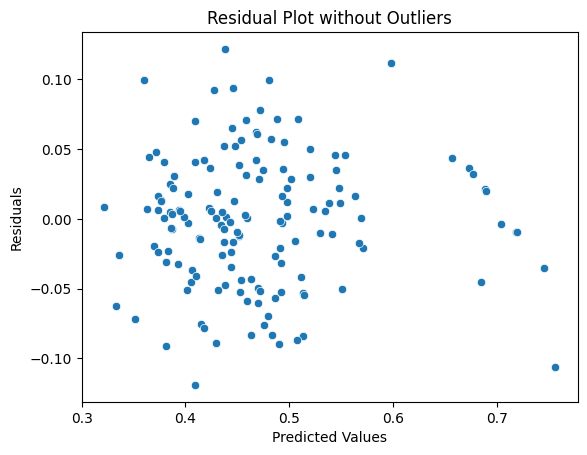

In [90]:
residuals_without_outliers = y_test_without_outliers - y_pred_without_outliers
sns.scatterplot(x=y_pred_without_outliers, y=residuals_without_outliers)
plt.title('Residual Plot without Outliers')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [91]:
import statsmodels.api as sm

X_train_with_const_without_outliers = sm.add_constant(X_train_without_outliers)  # Adds an intercept term

model_without_outliers1 = sm.OLS(y_train_without_outliers, X_train_with_const_without_outliers).fit()

print(model_without_outliers1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     106.3
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          4.71e-174
Time:                        11:36:56   Log-Likelihood:                 961.19
No. Observations:                 596   AIC:                            -1882.
Df Residuals:                     576   BIC:                            -1795.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0687    

In [92]:

vif_series_without_outliers= pd.Series([variance_inflation_factor(X_train_without_outliers.values, i) for i in range(X_train_without_outliers.shape[1])], index=X_train_without_outliers.columns)
print(vif_series_without_outliers)

visitors               25.350665
ad_impressions         19.910671
major_sports_event      1.748239
views_trailer           4.428524
genre_Comedy            2.039412
genre_Drama             2.067762
genre_Horror            1.923219
genre_Romance           1.896181
genre_Sci-Fi            1.891473
genre_Thriller          2.157967
dayofweek_Monday        1.076705
dayofweek_Saturday      1.294287
dayofweek_Sunday        1.222497
dayofweek_Thursday      1.309072
dayofweek_Tuesday       1.085740
dayofweek_Wednesday     2.016269
season_Spring           2.061399
season_Summer           2.293212
season_Winter           2.296038
dtype: float64


In [93]:
X_train_without_outliers_2 = X_train_without_outliers.drop('visitors', axis=1)
X_test_without_outliers_2= X_test_without_outliers.drop('visitors', axis=1)

model_without_outliers2 = LinearRegression()
model_without_outliers2.fit(X_train_without_outliers_2, y_train_without_outliers)
y_pred_without_outliers_2 = model_without_outliers2.predict(X_test_without_outliers_2)

In [94]:
mse_without_outliers_2 = mean_squared_error(y_test_without_outliers, y_pred_without_outliers_2)
r2_without_outliers_2 = r2_score(y_test_without_outliers, y_pred_without_outliers_2)

In [95]:
print(f"Mean Squared Error: {mse_without_outliers_2}")
print(f"R-squared: {r2_without_outliers_2}")

Mean Squared Error: 0.002985244186371958
R-squared: 0.6909557432607836


In [96]:
vif_series_without_outliers_2= pd.Series([variance_inflation_factor(X_train_without_outliers_2.values, i) for i in range(X_train_without_outliers_2.shape[1])], index=X_train_without_outliers_2.columns)
print(vif_series_without_outliers_2)

ad_impressions         10.981114
major_sports_event      1.732867
views_trailer           4.246602
genre_Comedy            1.926908
genre_Drama             1.967663
genre_Horror            1.785100
genre_Romance           1.786810
genre_Sci-Fi            1.831830
genre_Thriller          2.029663
dayofweek_Monday        1.069227
dayofweek_Saturday      1.269845
dayofweek_Sunday        1.206321
dayofweek_Thursday      1.305408
dayofweek_Tuesday       1.069033
dayofweek_Wednesday     1.970520
season_Spring           1.992108
season_Summer           2.146028
season_Winter           2.197232
dtype: float64


In [97]:
X_train_without_outliers_3 = X_train_without_outliers_2.drop('ad_impressions', axis=1)
X_test_without_outliers_3= X_test_without_outliers_2.drop('ad_impressions', axis=1)

model_without_outliers3 = LinearRegression()
model_without_outliers3.fit(X_train_without_outliers_3, y_train_without_outliers)
y_pred_without_outliers_3 = model_without_outliers3.predict(X_test_without_outliers_3)

In [98]:
mse_without_outliers_3 = mean_squared_error(y_test_without_outliers, y_pred_without_outliers_3)
r2_without_outliers_3 = r2_score(y_test_without_outliers, y_pred_without_outliers_3)

In [99]:
print(f"Mean Squared Error: {mse_without_outliers_3}")
print(f"R-squared: {r2_without_outliers_3}")

Mean Squared Error: 0.003016654640292218
R-squared: 0.6877040091380131


In [100]:
vif_series_without_outliers_3= pd.Series([variance_inflation_factor(X_train_without_outliers_3.values, i) for i in range(X_train_without_outliers_3.shape[1])], index=X_train_without_outliers_3.columns)
print(vif_series_without_outliers_3)

major_sports_event     1.703948
views_trailer          3.700282
genre_Comedy           1.632763
genre_Drama            1.706777
genre_Horror           1.437343
genre_Romance          1.483208
genre_Sci-Fi           1.561529
genre_Thriller         1.664618
dayofweek_Monday       1.060028
dayofweek_Saturday     1.255065
dayofweek_Sunday       1.181248
dayofweek_Thursday     1.300436
dayofweek_Tuesday      1.060892
dayofweek_Wednesday    1.899641
season_Spring          1.825379
season_Summer          1.821019
season_Winter          1.920524
dtype: float64


In [101]:
import statsmodels.api as sm

X_train_with_const_without_outliers_3 = sm.add_constant(X_train_without_outliers_3)

model_without_outliers3= sm.OLS(y_train_without_outliers, X_train_with_const_without_outliers_3).fit()
print(model_without_outliers3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     79.93
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          2.70e-139
Time:                        11:36:56   Log-Likelihood:                 872.94
No. Observations:                 596   AIC:                            -1710.
Df Residuals:                     578   BIC:                            -1631.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3034    

**Note on Outlier Handling**
* In this analysis, the views_trailer variable exhibited a significant number of high-end outliers, primarily due to exceptionally popular shows that skewed the distribution of trailer views. To ensure that these extreme values did not adversely affect the predictive performance of the regression model,the Interquartile Range (IQR) method was employed to cap the outliers.

* The process involved calculating the first (Q1) and third (Q3) quartiles of the views_trailer data using which the lower and upper bounds for the data were defined.
* Values below the lower bound were replaced with the lower bound value, while values above the upper bound were capped at the upper bound.

* This approach helps mitigate the influence of outliers, enabling the model to better generalize and capture relevant trends in the data.

 **We can notice that the genre variables do not contribute significantly to the model's explanatory power, as they have p-value>0.05. It is better too remove them**

In [102]:
genre_columns = ['genre_Comedy', 'genre_Drama', 'genre_Horror', 'genre_Romance',
                 'genre_Sci-Fi', 'genre_Thriller']

# Removing genre columns from the DataFrame
df_without_genre = df_without_outliers.drop(columns=genre_columns)

In [103]:
df_without_genre.head()

,visitors,ad_impressions,major_sports_event,views_trailer,views_content,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,0,56.70,0.51,0,0,0,0,0,1,1,0,0
1,1.46,1498.41,1,52.69,0.32,0,0,0,0,0,0,0,0,0
2,1.47,1079.19,1,48.74,0.39,0,0,0,0,0,1,0,0,0
3,1.85,1342.77,1,49.81,0.44,0,0,0,0,0,0,0,0,0
4,1.46,1498.41,0,55.83,0.46,0,0,1,0,0,0,0,0,1


In [104]:
X_cleaned = df_without_genre.drop('views_content', axis=1)
y_cleaned = df_without_genre['views_content']

In [105]:
X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned,y_cleaned, test_size=0.2, random_state=42)

In [106]:
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned,y_train_cleaned)

LinearRegression()

In [107]:
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)

In [108]:
mse_cleaned = mean_squared_error(y_test_cleaned, y_pred_cleaned)
r2_cleaned = r2_score(y_test_cleaned, y_pred_cleaned)
print(f"Mean Squared Error: {mse_cleaned}")
print(f"R-squared: {r2_cleaned}")

Mean Squared Error: 0.0021120438495018036
R-squared: 0.781352887428891


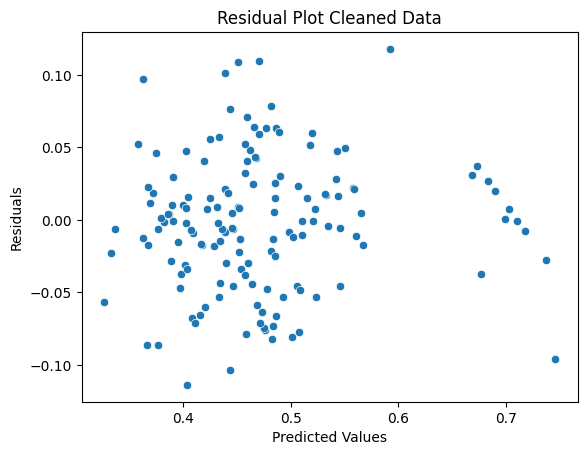

In [109]:
residuals_cleaned = y_test_cleaned - y_pred_cleaned
sns.scatterplot(x=y_pred_cleaned, y=residuals_cleaned)
plt.title('Residual Plot Cleaned Data')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [110]:
X_train_with_const_cleaned = sm.add_constant(X_train_cleaned)

model_without_outliers4 = sm.OLS(y_train_cleaned, X_train_with_const_cleaned).fit()

print(model_without_outliers4.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     151.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.08e-176
Time:                        11:36:57   Log-Likelihood:                 952.27
No. Observations:                 596   AIC:                            -1877.
Df Residuals:                     582   BIC:                            -1815.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0885    

In [111]:
vif_series_without_outliers_3= pd.Series([variance_inflation_factor(X_train_cleaned.values, i) for i in range(X_train_cleaned.shape[1])], index=X_train_cleaned.columns)
print(vif_series_without_outliers_3)

visitors               22.770616
ad_impressions         19.207542
major_sports_event      1.707147
views_trailer           4.397368
dayofweek_Monday        1.068198
dayofweek_Saturday      1.275118
dayofweek_Sunday        1.203038
dayofweek_Thursday      1.300178
dayofweek_Tuesday       1.077979
dayofweek_Wednesday     1.995783
season_Spring           2.014130
season_Summer           2.201997
season_Winter           2.217032
dtype: float64


In [112]:
X_train_cleaned_2 = X_train_cleaned.drop('ad_impressions', axis=1)
X_test_cleaned_2= X_test_cleaned.drop('ad_impressions', axis=1)

model_cleaned1 = LinearRegression()
model_cleaned1.fit(X_train_cleaned_2, y_train_cleaned)
y_pred_cleaned1 = model_cleaned1.predict(X_test_cleaned_2)

In [113]:
mse_cleaned1 = mean_squared_error(y_test_cleaned, y_pred_cleaned1)
r2_cleaned1 = r2_score(y_test_cleaned, y_pred_cleaned1)
print(f"Mean Squared Error: {mse_cleaned1}")
print(f"R-squared: {r2_cleaned1}")

Mean Squared Error: 0.0021351621222213107
R-squared: 0.7789595926216151


In [114]:
rmse_cleaned1 = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned1))
print(f"RMSE for model_cleaned1: {rmse_cleaned1}")

RMSE for model_cleaned1: 0.046207814514660946


In [115]:
X_train_with_const_cleaned1 = sm.add_constant(X_train_cleaned_2)

model_cleaned1 = sm.OLS(y_train_cleaned, X_train_with_const_cleaned1).fit()

print(model_cleaned1.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     163.6
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.24e-177
Time:                        11:36:57   Log-Likelihood:                 951.85
No. Observations:                 596   AIC:                            -1878.
Df Residuals:                     583   BIC:                            -1821.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0977    

In [116]:
vif_series_without_outliers_4= pd.Series([variance_inflation_factor(X_train_cleaned_2.values, i) for i in range(X_train_cleaned_2.shape[1])], index=X_train_cleaned_2.columns)
print(vif_series_without_outliers_4)

visitors               9.028237
major_sports_event     1.704786
views_trailer          4.314790
dayofweek_Monday       1.068156
dayofweek_Saturday     1.275086
dayofweek_Sunday       1.202347
dayofweek_Thursday     1.299715
dayofweek_Tuesday      1.077658
dayofweek_Wednesday    1.992170
season_Spring          1.995204
season_Summer          2.183193
season_Winter          2.186158
dtype: float64


In [117]:
X_train_cleaned_3 = X_train_cleaned_2.drop('visitors', axis=1)
X_test_cleaned_3= X_test_cleaned_2.drop('visitors', axis=1)

model_cleaned2 = LinearRegression()
model_cleaned2.fit(X_train_cleaned_3, y_train_cleaned)
y_pred_cleaned2 = model_cleaned2.predict(X_test_cleaned_3)

In [118]:
mse_cleaned2 = mean_squared_error(y_test_cleaned, y_pred_cleaned2)
r2_cleaned2 = r2_score(y_test_cleaned, y_pred_cleaned2)
print(f"Mean Squared Error: {mse_cleaned2}")
print(f"R-squared: {r2_cleaned2}")

Mean Squared Error: 0.0029678265644740515
R-squared: 0.6927588842025453


In [119]:
rmse_cleaned2 = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned2))
print(f"RMSE for model_cleaned2: {rmse_cleaned2}")

RMSE for model_cleaned2: 0.05447776210963563


In [120]:
X_train_with_const_cleaned2 = sm.add_constant(X_train_cleaned_3)

model_cleaned2 = sm.OLS(y_train_cleaned, X_train_with_const_cleaned2).fit()

print(model_cleaned2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     122.4
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.28e-143
Time:                        11:36:57   Log-Likelihood:                 868.79
No. Observations:                 596   AIC:                            -1714.
Df Residuals:                     584   BIC:                            -1661.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3111    

**Removing the non-significant variables from the model**

In [121]:
X_train_cleaned_4 = X_train_cleaned_3.drop('dayofweek_Thursday', axis=1)
X_test_cleaned_4= X_test_cleaned_3.drop('dayofweek_Thursday', axis=1)

model_cleaned3 = LinearRegression()
model_cleaned3.fit(X_train_cleaned_4, y_train_cleaned)
y_pred_cleaned3 = model_cleaned3.predict(X_test_cleaned_4)

In [142]:
X_train_cleaned_4

,major_sports_event,views_trailer,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
56,1,57.73,0,0,0,0,0,0,0,1
86,1,53.19,0,0,1,0,0,1,0,0
212,1,55.24,0,0,0,0,0,0,1,0
914,0,196.11,0,0,0,0,0,1,0,0
341,0,44.61,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
87,1,52.14,0,1,0,0,0,1,0,0
140,0,49.56,0,0,0,0,0,0,1,0
347,1,48.73,0,0,0,0,1,0,0,1
558,0,53.40,0,0,0,0,0,0,0,1


In [122]:
mse_cleaned3 = mean_squared_error(y_test_cleaned, y_pred_cleaned3)
r2_cleaned3 = r2_score(y_test_cleaned, y_pred_cleaned3)
print(f"Mean Squared Error: {mse_cleaned3}")
print(f"R-squared: {r2_cleaned3}")
rmse_cleaned3 = np.sqrt(mean_squared_error(y_test_cleaned, y_pred_cleaned3))
print(f"RMSE for model_cleaned3: {rmse_cleaned3}")

Mean Squared Error: 0.002974228340820706
R-squared: 0.6920961470563197
RMSE for model_cleaned3: 0.05453648632631833


In [123]:
X_train_with_const_cleaned3 = sm.add_constant(X_train_cleaned_4)

model_cleaned3 = sm.OLS(y_train_cleaned, X_train_with_const_cleaned3).fit()

print(model_cleaned3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     134.5
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          1.76e-144
Time:                        11:36:57   Log-Likelihood:                 868.28
No. Observations:                 596   AIC:                            -1715.
Df Residuals:                     585   BIC:                            -1666.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3125    

**Displaying model coefficients with column names**

In [124]:
coefficients = model_cleaned3.params
print(coefficients)

const                  0.312475
major_sports_event    -0.060474
views_trailer          0.002073
dayofweek_Monday       0.027718
dayofweek_Saturday     0.058914
dayofweek_Sunday       0.039613
dayofweek_Tuesday      0.030943
dayofweek_Wednesday    0.044930
season_Spring          0.015653
season_Summer          0.038414
season_Winter          0.028958
dtype: float64


In [125]:
column_names = X_train_cleaned_4.columns
print(column_names)

Index(['major_sports_event', 'views_trailer', 'dayofweek_Monday',
       'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Tuesday',
       'dayofweek_Wednesday', 'season_Spring', 'season_Summer',
       'season_Winter'],
      dtype='object')


In [126]:
for column, coef in zip(column_names, coefficients):
  print(f'{column}: {coef:.5f}')

major_sports_event: 0.31247
views_trailer: -0.06047
dayofweek_Monday: 0.00207
dayofweek_Saturday: 0.02772
dayofweek_Sunday: 0.05891
dayofweek_Tuesday: 0.03961
dayofweek_Wednesday: 0.03094
season_Spring: 0.04493
season_Summer: 0.01565
season_Winter: 0.03841


 * **Removing the 'visitors' column resulted in a decrease in the R² value from 77% to 69.7%. While this suggests a reduction in variance explanation power, the 'visitors' variable exhibited a high Variance Inflation Factor (VIF) of 9, indicating potential multicollinearity.**

* **Given the objective to identify and quantify key factors influencing viewership, the removal of 'visitors' enhances model interpretability. This adjustment allows for clearer insights into how other variables, such as 'views_trailer' and 'dayofweek', contribute to first-day viewership outcomes.**

* **Therefore, prioritizing a more interpretable model aligns better with our analytical goals.**



# **Checking the Linear Regression Assumptions**

**Multicolinearity**

In [127]:
vif_series_without_outliers_5= pd.Series([variance_inflation_factor(X_train_cleaned_4.values, i) for i in range(X_train_cleaned_4.shape[1])], index=X_train_cleaned_4.columns)
print(vif_series_without_outliers_5)

major_sports_event     1.626446
views_trailer          2.989559
dayofweek_Monday       1.039156
dayofweek_Saturday     1.166254
dayofweek_Sunday       1.124230
dayofweek_Tuesday      1.027992
dayofweek_Wednesday    1.629937
season_Spring          1.593440
season_Summer          1.595190
season_Winter          1.644995
dtype: float64


* There is no multicolinearity in the model as it has been treated already


**Linearity and Independence**

In [128]:
df_pred2 = pd.DataFrame({'Actual': y_test_cleaned, 'Predicted': y_pred_cleaned3})
df_pred2['Residuals'] = df_pred2['Actual'] - df_pred2['Predicted']
df_pred2.head()

,Actual,Predicted,Residuals
267,0.41,0.446545,-0.036545
335,0.70,0.685705,0.014295
128,0.71,0.686640,0.023360
192,0.40,0.425105,-0.025105
502,0.40,0.467191,-0.067191


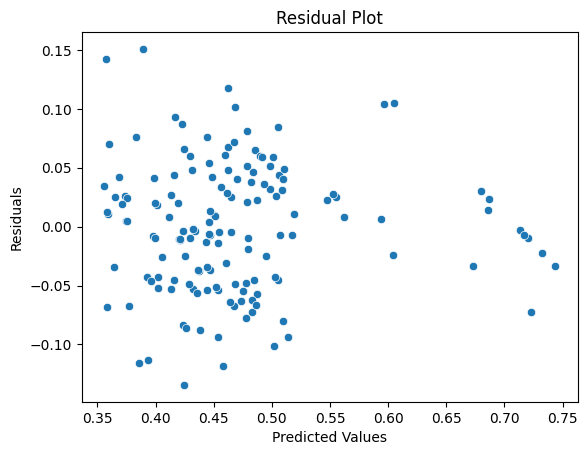

In [129]:
sns.scatterplot(x=y_pred_cleaned3, y=df_pred2['Residuals'])
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

* There is no visible pattern in the Residuals plot indicating a Linear distribution.
* Since the residuals are scattered, this indicates that the independence assumption holds.

**Normality**

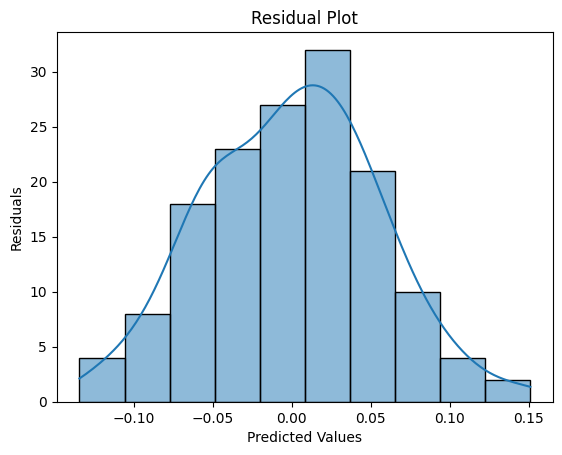

In [130]:
sns.histplot(df_pred2['Residuals'], kde=True)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

* While not perfect, it can still be acceptable as a normal distribution

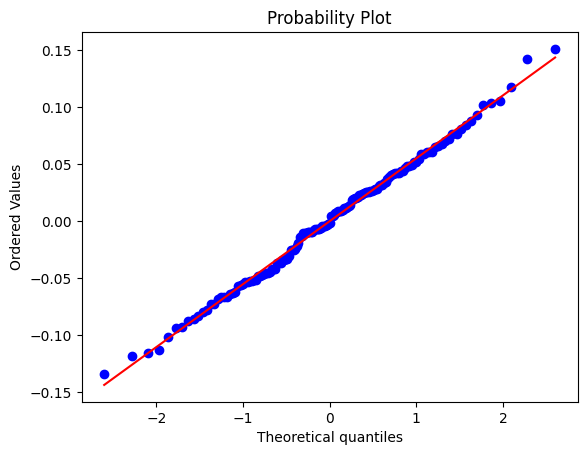

In [131]:
stats.probplot(df_pred2['Residuals'], dist='norm', plot=pylab)
plt.show()

**Homoscedacity**

In [132]:
name = ["F statistic", "p-value"]
test = het_goldfeldquandt(df_pred2['Residuals'], X_test_cleaned_4)
lzip(name, test)

[('F statistic', 0.8016562565882764), ('p-value', 0.812574391493199)]

* Since the p-value > 0.05, we can say that the residuals are homocedastic

# **Actionable Insights and Recommendations**

# Actionable Insights

**1. Content Release Timing:**

* Most content is released on Fridays and Wednesdays, with the least on Mondays and Tuesdays. Weekends see a significant increase in viewership.

**2. Seasonal Trends:**

* The content release is high in Winter and Summer seasons.
* The least content release is in Spring and Fall seasons.
This might be because of the change in the viewer's preference for content during the seasons and holiday seasons.


**3. Genre Popularity and Strategy:**

* Comedy is the most released genre, with Sci-Fi attracting the highest mean viewership. Romance performs best on Fridays, while Horror excels on Tuesdays.

**4. Impact of Major Sports Events:**

* The occurrence of major sports events significantly decreases the first-day content viewership.

**5. Trailer Views and Content Promotion:**

* There is a strong positive correlation between trailer views and first-day content views. Content with higher trailer views tends to have significantly higher first-day views.

**6. Outliers in Viewership:**

* Outliers are present on weekends, indicating some content gets unusually high first-day viewership on Saturdays and Sundays.

**7. Content and Platform Visitors:**

* There appears to be no direct correlation between overall platform visitors and first-day content views.



**Inferences from OLS Regression Model:**

* **Overall Model Performance:**

* R-squared (0.697) indicates that around 69.7% of the variance in the dependent variable (first-day content views) can be explained by the predictors used in the model. This is a strong model fit.
* F-statistic (134.5, p-value: 1.76e-144) confirms that the overall model is statistically significant, meaning the predictors collectively explain a significant portion of the variance in content views.

* **Impact of Trailer Views:**

* Coefficient of views_trailer (0.0021, p < 0.001) suggests that for every additional trailer view, there is a 0.0021 increase in first-day content views, all else being equal. This is a very strong and positive relationship, making trailer promotion critical for boosting content views.

* **Impact of Major Sports Events:**

* Negative coefficient of major_sports_event (-0.0605, p < 0.001) means that if a major sports event takes place, first-day content views decrease by approximately 6%. This is a substantial drop, suggesting that sports events have a large negative impact on viewership.

* **Day of Week Influence:**

* Saturday (0.0589, p < 0.001) shows the strongest positive impact on first-day views, increasing them by about 5.89% compared to the reference day (probably Friday or some base day).
* Sunday (0.0396, p < 0.001) also has a positive effect, increasing views by about 3.96%.
* Wednesday (0.0449, p < 0.001) similarly contributes positively, increasing views by 4.49%.
* Monday and Tuesday have weak positive impacts, but with higher p-values (0.077 and 0.057, respectively), making these days less significant statistically.

* **Seasonal Impact:**

* Summer (0.0384, p < 0.001) and Winter (0.0290, p < 0.001) have positive impacts on viewership, with content in summer yielding a 3.84% increase and winter a 2.9% increase.
* Spring (0.0157, p = 0.022) has the lowest positive effect but is still statistically significant.

# Recommendations

**Recommendations Based on Model Insights:**

* **Focus on Trailer Marketing:**

Since trailer views significantly drive content viewership, invest heavily in promoting trailers across various platforms. Ensure trailers are engaging, properly marketed, and released well ahead of the content itself to maximize anticipation and viewership.

* **Avoid Major Sports Events:**

The significant negative impact of sports events on viewership (a 6% decrease) suggests avoiding content releases during such periods. Either avoid these dates altogether or use them for counter-programming with content that targets non-sports audiences.

* **Leverage Key Days for Content Release:**

The model clearly shows that Saturday, Sunday, and Wednesday are the best days to release content for maximizing first-day views. Scheduling high-profile content on these days can drive higher engagement.
Monday and Tuesday are less impactful, so they should be reserved for lower-priority or niche content releases.

* **Maximize Seasonal Trends:**

Summer and Winter content releases are the most effective. These seasons likely coincide with holidays and increased leisure time, so focusing on blockbuster or highly anticipated content during these periods can significantly boost first-day views.

* **Explore Spring Releases:**

Though Spring has a weaker effect, it’s still statistically significant. Use spring releases for experimental or niche content that could benefit from less competition in these off-peak seasons.

* **Detailed Outlier Investigation:**

Investigating the outliers that occur on weekends, as noted in previous insights, may help in understanding what specific elements contribute to significantly higher-than-average views. These could include viral marketing, popular themes, or specific genres.